# Homework_2022_03_07

<font color=ff0000> 截止日期 3.31（周四） 23:59</font>

### Exercise 1 Pandas基础练习(4')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

1.1 创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame(1')：

In [3]:
# TODO
df = pd.DataFrame({"age":data["age"],"gender":data["gender"],"occupation":data["occupation"],"zip_code":data["zip_code"]})
df.index += 1
df

,age,gender,occupation,zip_code
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002


1.2 删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行(0.5'):

In [4]:
# TODO
df = df.drop_duplicates()
df = df.drop(df[df["occupation"] == "other"].index)
df

,age,gender,occupation,zip_code
1,24,M,technician,85711
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002
11,53,M,lawyer,90703


1.3 以两种方式访问DataFrame的第一行(0.5')：

In [5]:
# TODO
print(df.loc[1])
print(df.iloc[0])

age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object
age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object


1.4 以两种方式访问DataFrame的"occupation"列(0.5')：

In [6]:
# TODO
print(df["occupation"])
print(df.iloc[:,2])
print(pd.DataFrame(df,columns = ["occupation"]))

1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object
1        technician
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
Name: occupation, dtype: object
       occupation
1      technician
3          writer
4      technician
5      technician
6       executive
7   administrator
9   administrator
10        student
11         lawyer


1.5 打印出DataFrame中出现次数最多的职业名称(0.5')：

In [7]:
# TODO
count = df["occupation"].value_counts()
print(count.idxmax())

technician


1.6 将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集(0.5')；
2.合并后只保留data_2的所有数据(0.5')。

In [8]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)

# TODO
##################### Method 1 #######################
df_a = pd.concat([df, df2], axis=1)
print(df_a)
##################### Method 2 #######################
df_b = pd.concat([df, df2], axis=1).iloc[:len(df2)]
print(df_b)

     age gender     occupation zip_code zip_code     name
1   24.0      M     technician    85711    94043    Alice
3   23.0      M         writer    32067    98101      Bob
4   24.0      M     technician    43537    30329     Dave
5   33.0      F     technician    15213      NaN      NaN
6   42.0      M      executive    98101      NaN      NaN
7   57.0      M  administrator    91344      NaN      NaN
9   36.0      M  administrator    05201      NaN      NaN
10  29.0      M        student    01002      NaN      NaN
11  53.0      M         lawyer    90703      NaN      NaN
0    NaN    NaN            NaN      NaN    85711     Alan
2    NaN    NaN            NaN      NaN    15213  Abigail
    age gender  occupation zip_code zip_code   name
1  24.0      M  technician    85711    94043  Alice
3  23.0      M      writer    32067    98101    Bob
4  24.0      M  technician    43537    30329   Dave
5  33.0      F  technician    15213      NaN    NaN
6  42.0      M   executive    98101      NaN

### Exercise 2 Pandas数据分析(6')

本部分数据基于2022年3月的COVID-19疫情数据进行数据分析。

在此致谢数据来源：https://github.com/BlankerL/DXY-COVID-19-Data ，并祝愿疫情的影响早日结束。

2.1 读取COVID-19_March.csv，通过shape和info()查看数据基本信息(0.5')。

In [9]:
import pandas as pd
#TODO
df=pd.read_csv('./COVID19_March.csv')
print(df.shape)
print(df.info())

(34021, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confi

2.2 从原表格的updateTime中提取最后更新时间，去除具体时间得到日期，并在原DataFrame中增加一列"Date"保存日期(0.5')。

In [10]:
#TODO
print(df["updateTime"].values)
# date = df["updateTime"][:,:-4]
date = np.array(df["updateTime"].values)
for i in range(len(date)):
    date[i] = date[i].split(" ")[0]
df2 = pd.DataFrame({"date":date})
# print(df2)
# print(df)
df.insert(df.shape[1],"Date",date)
print(df)

['2022/3/27 17:18' '2022/3/27 17:18' '2022/3/27 17:18' ... '2022/3/1 8:50'
 '2022/3/1 8:50' '2022/3/1 8:50']
      continentName continentEnglishName countryName  \
0                亚洲                 Asia          中国   
1                亚洲                 Asia          中国   
2                亚洲                 Asia          中国   
3                亚洲                 Asia          中国   
4                亚洲                 Asia          中国   
...             ...                  ...         ...   
34016            亚洲                 Asia       塔吉克斯坦   
34017           南美洲        South America     荷兰加勒比地区   
34018            其他               Others     钻石公主号邮轮   
34019           北美洲        North America       蒙特塞拉特   
34020           南美洲        South America       福克兰群岛   

                 countryEnglishName provinceName  \
0                             China          广东省   
1                             China          广东省   
2                             China          广东省   
3         

2.3 这里给出的数据由每天循环爬取得到，因此同一地区同一日的数据可能会有多项纪录，但我们只需保存每一天同一个地区（精确到城市）最后一条记录。请对数据进行筛选，按provinceName, cityName, Date三列为标准去重，并将DataFrame按时间从早到晚的顺序排序(1')。

In [11]:
#TODO
df_new = df.drop_duplicates(subset=['provinceName','cityName','Date'], keep='last')
df_new['updateTime'] = pd.to_datetime(df_new['updateTime'])
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_sorted = df_new.sort_values("updateTime")
df_sorted

/tmp/ipykernel_4289/3123073515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['updateTime'] = pd.to_datetime(df_new['updateTime'])
/tmp/ipykernel_4289/3123073515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])


,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,Date
34020,南美洲,South America,福克兰群岛,NaN,福克兰群岛,NaN,0,109,0,80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33892,南美洲,South America,委内瑞拉,Venezuela,委内瑞拉,Venezuela,0,514315,0,357339,5631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33891,非洲,Africa,埃及,Egypt,埃及,Egypt,981002,480727,0,299434,23992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33890,欧洲,Europe,波黑,Bosnia and Herzegovina,波黑,Bosnia and Herzegovina,965003,370652,0,192218,15411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33889,南美洲,South America,巴拉圭,Paraguay,巴拉圭,Paraguay,973009,639078,0,448387,18315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,北美洲,North America,英属维尔京群岛,NaN,英属维尔京群岛,NaN,0,6141,0,2649,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
397,非洲,Africa,厄立特里亚,NaN,厄立特里亚,NaN,985003,9724,0,6663,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
399,欧洲,Europe,安道尔,Andorra,安道尔,Andorra,965002,39713,0,37999,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
380,非洲,Africa,刚果（布）,NaN,刚果（布）,NaN,0,24062,0,8208,384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27


2.4 新建两个DataFrame，分别包含筛选后国内的数据和国外的数据，便于后面分别统计(0.5')。

In [12]:
#TODO
df_c = df_sorted[df_sorted["countryName"] == '中国']
df_f = df_sorted[df_sorted["countryName"] != '中国']
df_f

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,Date
34020,南美洲,South America,福克兰群岛,NaN,福克兰群岛,NaN,0,109,0,80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33892,南美洲,South America,委内瑞拉,Venezuela,委内瑞拉,Venezuela,0,514315,0,357339,5631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33891,非洲,Africa,埃及,Egypt,埃及,Egypt,981002,480727,0,299434,23992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33890,欧洲,Europe,波黑,Bosnia and Herzegovina,波黑,Bosnia and Herzegovina,965003,370652,0,192218,15411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
33889,南美洲,South America,巴拉圭,Paraguay,巴拉圭,Paraguay,973009,639078,0,448387,18315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01 08:50:00,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,非洲,Africa,贝宁,Benin,贝宁,Benin,982001,26952,0,20930,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
396,北美洲,North America,英属维尔京群岛,NaN,英属维尔京群岛,NaN,0,6141,0,2649,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
397,非洲,Africa,厄立特里亚,NaN,厄立特里亚,NaN,985003,9724,0,6663,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27
399,欧洲,Europe,安道尔,Andorra,安道尔,Andorra,965002,39713,0,37999,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-27 10:52:00,2022-03-27


2.5 对于境外的每一个国家，请用记录中最后一天的病例数(province_confirmed)减去第一天的病例数，再除以之间间隔的天数，以此统计日平均新增情况，并打印全球平均日新增的前十名(1')。

提示：可以使用groupby&apply等方法；请注意，记录的第一天与最后一天未必是3.1和3.27。
参考阅读：https://zhuanlan.zhihu.com/p/101284491

In [13]:
#TODO
def f(x):
    df = x.sort_values(by = 'Date',ascending=True)
    return (df.iloc[-1,:]['province_confirmedCount'] - df.iloc[0,:]['province_confirmedCount'])/((df.iloc[-1,:]['Date'] - df.iloc[0,:]['Date']).days-1)

# def fd(x):
#     df = x.sort_values(by = 'Date',ascending=True)
#     return df.iloc[-1,:]['Date'] - df.iloc[0,:]['Date']
group = df_f.groupby("countryName")
# group1 = df_f.groupby("countryName").agg({"Date":"max"})
# group2 = df_f.groupby("countryName").agg({"Date":"min"})
# print(group1,group2)
group3 = group.apply(f)
# group4 = group.apply(fd)
# group5 = group
group4 = group3.sort_values(ascending=False)
group4.iloc[:10]



/tmp/ipykernel_4289/3921620292.py:4: RuntimeWarning: invalid value encountered in long_scalars
  return (df.iloc[-1,:]['province_confirmedCount'] - df.iloc[0,:]['province_confirmedCount'])/((df.iloc[-1,:]['Date'] - df.iloc[0,:]['Date']).days-1)


countryName
韩国     326695.64
越南     215222.96
德国     185316.24
法国      79587.52
英国      72964.88
俄罗斯     70965.96
荷兰      63870.72
意大利     56816.72
日本      53891.40
巴西      41040.64
dtype: float64

2.6 利用pandas的cut功能对境外的日平均新增情况进行分组，打印每个数量级区间内的国家数(0.5')。

In [14]:
#TODO
group5 = pd.cut(group4,[0,10,100,1000,10000,100000,1000000],)
group6 = pd.Series(group5)
group6.value_counts()



(100, 1000]          52
(10, 100]            49
(0, 10]              40
(1000, 10000]        39
(10000, 100000]      24
(100000, 1000000]     3
dtype: int64

2.7 绘制3月以来吉林省每日新增的疫情曲线，以后一日减去前一日的确诊病例之差作为新增标准(提示，差分操作在pandas中也有对应的方法)(1')。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


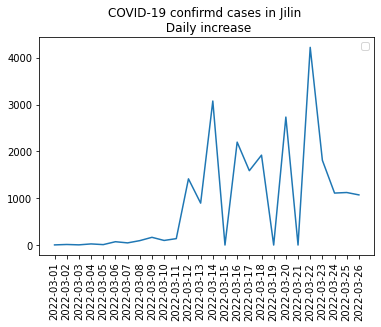

In [15]:
#TODO
df_j = df_c[df_c["provinceName"] == "吉林省"]
group7 = df_j.groupby("Date")
# print(list(group7))
group8 = group7.agg({"city_confirmedCount":"sum"})
# group8 = group7.apply(lambda x: x.iloc[0]["province_confirmedCount"])
group9 = group8.diff()
import matplotlib.pyplot as plt

plt.title('COVID-19 confirmd cases in Jilin \n Daily increase')  
# plt.title('')  
x = [str(i).split(' ')[0] for i in group9.index][:-1]
plt.plot(x,group9.values[1:])
plt.xticks(rotation=90)
plt.legend(loc=0)      

2.8 请绘制3月以来上海市每日新增的疫情曲线，在一张图上同时画出总新增与本土新增（cityName中有境外输入条目，可以作为区分）(1')。

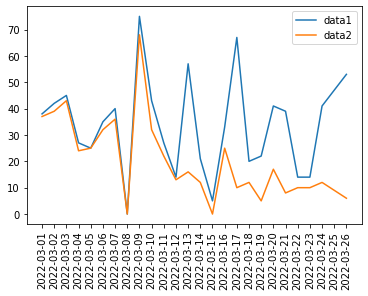

In [16]:
#TODO
df_s = df_c[df_c["provinceName"] == "上海市"]
df_sw = df_s[df_s["cityName"] == "境外输入"]
group10 = df_s.groupby("Date")
group12 = df_sw.groupby("Date")
# print(list(group7))
group11 = group10.agg({"city_confirmedCount":"sum"})
# print(list(group12))
group13 = group12.apply(lambda x: x["city_confirmedCount"])
# print(list(group13))
group14 = group11.diff()
group15 = group13.diff()
x1 = x
plt.xticks(rotation=90)
plt.plot(x,group14.values[1:],label='data1')
plt.plot(x1,group15.values[1:],label='data2')
plt.legend()
plt.show()

### 附加题 聚类方法比较及评价 (+2')
本题我们利用Minst数据集进行KMeans聚类方法的测试，并对聚类的效果进行评估。

In [17]:
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = pd.read_csv('./train_X.csv') # 为了方便起见，这里只采用前6000个MNIST数据
y = pd.read_csv('./train_y.csv')
X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

(6000, 784)
(6000, 1)


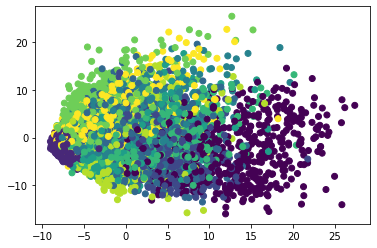

In [18]:
pca2d = PCA(n_components=2)
X_std = preprocessing.scale(X) # 数据标准化
X_2d = pca2d.fit_transform(X_std)# 数据降维至两维便于可视化
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

3.1 请在原始的标准化数据X_std和降至二维的数据X_2d上分别进行KMeans聚类，并对两种聚类结果进行可视化（以标签作为颜色，均只在二维可视化即可）和纯度计算（参考PPT第四页的公式）。+1'

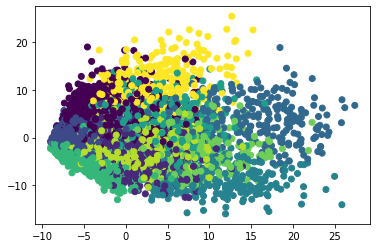

In [19]:
#TODO
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_std)
label_std = kmeans.labels_
kmeans2 = MiniBatchKMeans(n_clusters = total_clusters)
kmeans2.fit(X_2d)
label_2d = kmeans2.labels_
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_std)

# init_centers_index = np.random.randint(img.shape[0]*img.shape[1], size=10)

Purity1:  0.46449999999999997
Purity2:  0.3296666666666667


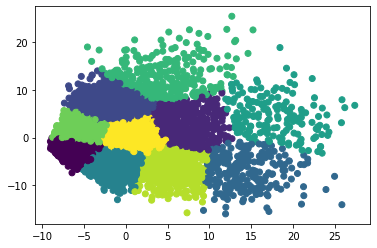

In [20]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_2d)

# 纯度1
pi_std = np.zeros((10,10))
nr = np.zeros((10,))
ni = np.zeros((10,))
for i in range(10):
    for j in range(10):
        pi_std[i][j] = ((y.T == i)&(label_std == j)).sum()
    nr[i] = (label_std == i).sum()
    ni[i] = (y.T == i).sum()
# p_std =
# print(pi_std)
pi_std_ = pi_std.max(0)
# print(pi_std)
p_sr = pi_std_/nr
p_sr
P = p_sr*nr/y.shape[0]
P = P.sum()
print("Purity1: ",P)

# 纯度1
pi_2d = np.zeros((10,10))
nr_2d = np.zeros((10,))
for i in range(10):
    for j in range(10):
        pi_2d[i][j] = ((y.T == i)&(label_2d == j)).sum()
    nr_2d[i] = (label_2d == i).sum()
# p_std =
# print(pi_std)
pi_2d_ = pi_2d.max(0)
# print(pi_std)
p_sr_2d = pi_2d_/nr_2d
p_sr_2d
P_2d = p_sr_2d*nr_2d/y.shape[0]
P_2d = P_2d.sum()
print("Purity2: ",P_2d)


3.2 请用KM算法等方式实现聚类结果和原标签的最优匹配，并在此基础上计算两种结果的F值。+1'

参考阅读：

1. 匈牙利算法Wiki https://zh.wikipedia.org/wiki/%E5%8C%88%E7%89%99%E5%88%A9%E7%AE%97%E6%B3%95 
2. KM算法讲解 https://blog.csdn.net/sixdaycoder/article/details/47720471
3. KM算法python实现https://blog.csdn.net/weixin_39504758/article/details/120183504


In [21]:
#TODO
def match(f):
#     pass
    f = f.copy()
    res = np.zeros((10,))
#     used = []
#     print(f)
    for i in range(10):
#         print(f)
        label = f.argmax()
#         print(label)
        res[int(label/10)] = label%10
        f[:,label%10] = -100
        f[int(label/10),:] = -100
    return res
# F1
# print(pi_2d)
Nir1 = pi_std
Nir2 = pi_2d
nr1 = nr
nr2 = nr_2d
pc1 = Nir1/nr1
pc2 = Nir2/nr2
rc1 = Nir1/ni
rc2 = Nir2/ni
# print(pc1,pc2)
fir1 = 2*rc1*pc1/(pc1+rc1+1e-20)
fir2 = 2*rc2*pc2/(pc2+rc2+1e-20)
# print(fir1)
# fir1.sort(axis = 1)
# print(fir1)
match1 = match(fir1)
match2 = match(fir2)
fi1 = np.zeros((10,))
fi2 = np.zeros((10,))
# print(match1)
for i in range(10):
    fi1 = fir1[i][int(match1[i])]
    fi2 = fir2[i][int(match2[i])]
    
F1 = (fi1*ni/y.shape[0]).sum()
print("F1: ",F1)
# F2
F2 = (fi2*ni/y.shape[0]).sum()
print("F2: ",F2)

# print()

F1:  0.33709449929478147
F2:  0.2512437810945274
